In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can and Environment Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 

Data contains information on labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months for Yukon, Northwest Territories and Nunavut. 

Data set is obtained from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201 via ProductID 14100292. 


We implement a friendly user interface based on buttons and dropdown menus that allows the user to explore multiple data sets and subsets of data for a specified date and classification. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}


<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="14100292",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(prod_ID)
display(DS_button)

Text(value='14100292', description='productID value', placeholder='ProductID value', style=DescriptionStyle(de…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [5]:
# # Download data 
productId = prod_ID.value

download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df


# Example
#data = download_and_store_json(productId)

# Example, we will select the study we downloaded previously 

df_fullDATA = zip_table_to_dataframe(productId)



df_fullDATA.head()


PARSING DATA AS PANDAS DATAFRAME


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438711,1.1.1.1.1.1,18.3,NaN,NaN,NaN,1
1,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438712,1.1.1.1.1.2,18.3,NaN,NaN,NaN,1
2,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438713,1.1.1.2.1.1,14.7,NaN,NaN,NaN,1
3,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438714,1.1.1.2.1.2,14.7,NaN,NaN,NaN,1
4,1992-03-01,Yukon,2016A000260,Population,Males,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438715,1.1.2.1.1.1,9.4,NaN,NaN,NaN,1


<h2 align='center'>Downloading Environment Can Data</h2>

We will download data for the municipalities found within the Yukon. 

In [6]:
# YT, NT, NU
%run -i climate_func.py
station_ID = widgets.Text(
    value="50842,51058,51277",
    placeholder='StationID value',
    description='StationID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(station_ID)
display(DS_button)

Text(value='50842,51058,51277', description='StationID value', placeholder='StationID value', style=Descriptio…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [7]:
#27950,53022,53025,1556,54178,53027,54198,50842
vals = station_ID.value
split_vals = vals.split(",")
int_split_vals = [int(val) for val in split_vals]

In [13]:
all_the_weather_data_YUKON = []
for item in int_split_vals:
    weather_data = download_data_date_range(item,'Jan2004','Dec2018')
    all_the_weather_data_YUKON.append(weather_data)
all_the_weather_data_YUKON[0].head()


,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2004-01-01 00:00:00,2004,1,1,00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-01 01:00:00,2004,1,1,01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-01-01 02:00:00,2004,1,1,02:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01 03:00:00,2004,1,1,03:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01 04:00:00,2004,1,1,04:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [33]:
subcategories = df_fullDATA.iloc[:,3].unique()
values = df_fullDATA.iloc[:,10].unique()
dates = df_fullDATA.iloc[:,0].unique()
geog = df_fullDATA.iloc[:,1].unique()
age_group = df_fullDATA.iloc[:,5].unique()
sex = df_fullDATA.iloc[:,4].unique()
data_type = df_fullDATA.iloc[:,7].unique()
statistics = df_fullDATA.iloc[:,6].unique()

datasets_dp = widgets.Dropdown(
    options = subcategories, 
    description ='Select category:', 
    style = style, 
    disabled=False
)

geo_dp = widgets.Dropdown(
    options = geog, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

age_group_gp = widgets.Dropdown(
    options = age_group, 
    description ='Select age group:', 
    style = style, 
    disabled=False
)

statistics_dp = widgets.Dropdown(
    options = statistics, 
    description ='Select statistics type:', 
    style = style, 
    disabled=False
)

sex_gp = widgets.Dropdown(
    options = sex, 
    description ='Select gender identity:', 
    style = style, 
    disabled=False
)


data_type_gp = widgets.Dropdown(
    options = data_type, 
    description ='Select data type:', 
    style = style, 
    disabled=False
)


sdates_dp = widgets.Dropdown(
    value = dates[-181],
    options = dates, 
    description ='Select starting date:', 
    style = style, 
    disabled=False
)

edates_dp = widgets.Dropdown(
    value = dates[-1],
    options = dates, 
    description ='Select end date:', 
    style = style, 
    disabled=False
)

CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )


tab3 = VBox(children=[HBox(children=[geo_dp,datasets_dp]),
                      HBox(children=[sdates_dp,edates_dp]),
                      HBox(children=[sex_gp,age_group_gp]),
                      HBox(children=[data_type_gp,statistics_dp]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
subdata = datasets_dp.value
sdate = sdates_dp.value
edate = edates_dp.value
esex = sex_gp.value
eage = age_group_gp.value
edatatype = data_type_gp.value
geoLoc = geo_dp.value
stat = statistics_dp.value

In [99]:
df_subdata = df_fullDATA[df_fullDATA.iloc[:,3]==subdata]
df_subdata_time = df_subdata[(df_subdata['REF_DATE'] >= sdate) & (df_subdata['REF_DATE'] <= edate)]
df_subdata_time_sex = df_subdata_time[df_subdata_time["Sex"]==esex]
df_subdata_time_sex_age = df_subdata_time_sex[df_subdata_time_sex["Age group"]==eage]
df_subdata_time_sex_age_dt = df_subdata_time_sex_age[df_subdata_time_sex_age["Data type"]==edatatype]
df_subdata_time_sex_age_dt_geo = df_subdata_time_sex_age_dt[df_subdata_time_sex_age_dt["GEO"]==geoLoc]
df_subdata_time_sex_age_dt_geo_val = df_subdata_time_sex_age_dt_geo[df_subdata_time_sex_age_dt_geo["Statistics"]==stat]
#df_subdata_time_sex_age_dt_geo_val.head()

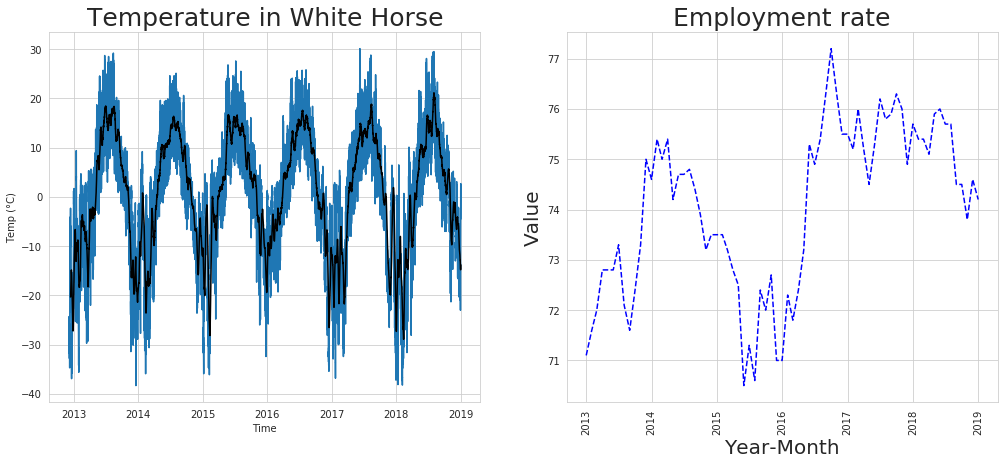

In [100]:

import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(facecolor='w',figsize=(17,15))
plt.subplot(2, 2, 1)
weather_data['Temp (°C)'] = weather_data['Temp (°C)'].interpolate()
sns.set_style('whitegrid')

if geoLoc=="Yukon":
    
    weather_data = all_the_weather_data_YUKON[0]
    title = "White Horse"
elif geoLoc=="Northwest Territories":
    weather_data = all_the_weather_data_YUKON[1]
    title = "Yellowknife"
elif geoLoc=="Nunavut":
    weather_data = all_the_weather_data_YUKON[2]
    title = "Rankin Inlet"

plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'])
plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'].rolling(window=250,center=False).mean(), '-k', alpha=1.0)
plt.title("Temperature in " + title ,fontsize=25)
plt.ylabel('Temp (°C)')
plt.xlabel('Time')


plt.subplot(2, 2, 2)
plt.plot(df_subdata_time_sex_age_dt_geo_val["REF_DATE"],df_subdata_time_sex_age_dt_geo_val["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(subdata ,fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)


<h2 align='center'>References</h2>

Statistics Canada.  Table  14-10-0292-01   Labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201


# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)